## Task overview [please read]

Please read through the notebook and attempt to answer the questions as best as possible using the statistical concepts and Python skills from the module. The parts are designed to assess independent aspects of the module, so if you cannot complete one part, you can try the next. If a question uses a value calculated in a previous section or question that you do not have or have calculated incorrectly, simply use your best estimate of this value as your starting point and complete the exercise as best you can. You will not be penalised twice for an incorrect or missing value.

When you have completed the exercises to the best of your abilty, please submit via the link on the Assessment section of the Moodle page. This submission should be your own work. Submission of this notebook via the Moodle page constitutes a declaration by you that the work has been completed by you, without the assistance of other people or external tools, websites or other sources of information. If there are reasonable grounds to suspect this is not a fair representation of your own work then you may be asked to explain your work to the module leader, or another member of staff. 

There may be more than one way to solve each problem. Marks will be partly allocated on how well you select from among all possible approaches. Answers that simply attempt to "do everything" will not be marked as highly as those that are more selective. Marks will also be based on how results are presented. Good clear plots with appropriate elements (labels, legends etc) are expected. Numbers should be quoted to appropriate precisions. In particular, outputting a number, or reporting it, to very high precision indicates a poor understanding of the reliability of these numbers. Marks will also be given for a good interpretation of results and plots. Remember that this assessment is designed to test your understanding of the course materials, as well as your ability to apply this understanding to related methods and ideas.

### Maximum figure, code output and word count per section

There is a maximum of **3 figures** (plots or print out tables), **320 characters** of additional user defined output (e.g. using the `print` command), and **400 words** in markdown allowed per section. This restriction will be applied independently per section and the maximum is strict. If a response includes more than the allowed number of figures, then the subsequent figures will not count towards your mark. If the code outputs more than the allowed number of characters of user defined output, then subsequent output will not count towards your mark. Note that characters that are part of a table (e.g. frequency table) will not be included in this count. If the markdown section includes more than the allowed number of words then the subsequent words will not count towards your mark. Mathematical equations will not be included in the word count. There may also be a mark penalty for not following guidance. These restrictions help you to understand the level of detail required for an appropriate answer. In many cases, you may not need to use your full allowance to answer the questions.

In [43]:
%matplotlib inline
# Standard commands and imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Data: Assessment Grades

In the block below are defined two arrays of integers, `assessment1marks` and `assessment2marks`. These are the marks for two related assessments with the students listed in the same order. Therefore, the $i$th position in arrays, `assessment1marks[i]` and `assessment2marks[i]`, are the marks for the $i$th student in assessment 1 and 2 respectively.

In [44]:
assessment1marks = np.array([77, 13, 87, 77, 57, 63, 100, 27, 77, 90, 13, 50,
    49, 67, 97, 100, 0, 73, 100, 70, 80, 53, 97, 70, 63, 73, 40, 97, 53, 83, 97,
    87, 40, 83, 63, 70, 60, 23, 83, 60, 13, 60, 27, 77, 70, 30, 60, 0, 40, 30,
    100, 7, 7, 80, 57, 70, 67, 70, 77, 67, 70, 50, 53, 53, 77, 57, 63, 0, 80,
    57, 27, 0, 33, 87, 73, 33, 87, 3, 100, 23, 83, 77, 80, 100, 0, 90, 27, 10,
    60, 13, 93, 50, 80, 27, 33, 50, 63, 77, 47, 13, 80, 80, 67, 70, 83, 43, 60,
    73, 63, 73, 30, 77, 90, 53, 40, 17])
assessment2marks = np.array([54, 48, 91, 88, 61, 73, 88, 85, 86, 95, 42, 60, 66,
    68, 94, 100, 78, 80, 92, 75, 73, 69, 96, 66, 83, 82, 62, 89, 58, 90, 85, 73,
    64, 80, 75, 80, 85, 43, 73, 81, 49, 76, 53, 68, 70, 53, 71, 30, 68, 65, 88,
    37, 48, 83, 68, 87, 76, 89, 64, 78, 59, 70, 64, 66, 83, 83, 83, 41, 76, 73,
    48, 27, 41, 84, 72, 73, 83, 27, 97, 35, 87, 71, 67, 95, 34, 81, 63, 29, 86,
    32, 96, 58, 83, 52, 42, 63, 73, 83, 53, 67, 91, 83, 79, 73, 69, 62, 80, 75,
    72, 83, 63, 90, 80, 59, 85, 55])

## Section A: Exploring the data [25 marks]

Use the tools you have learned so far to explore the characteristics of the data above and present this in a readable and informative manner. In particular, you may choose to:
* explore the central tendency and spread of marks for each assessment independently
* examine the general shape of each distribution and whether some marks are outliers
* investigate whether there are other systematic patterns in the marks, such as very common marks
* explore what the mark for a student in one assessment typically tells you about their mark in the other assessment

You should implement some code (in a code block) to run your evaluations and then write about this in a subsequent markdown block. 

**Remember:** There is a maximum of **3 figures** (plots or print out tables), **320 characters** of additional user defined output (e.g. using the `print` command), and **400 words** in markdown allowed per section.

The modal value of assessment1marks is [77] appearing [9] times.
,The modal value of assessment2marks is [83] appearing [10] times.


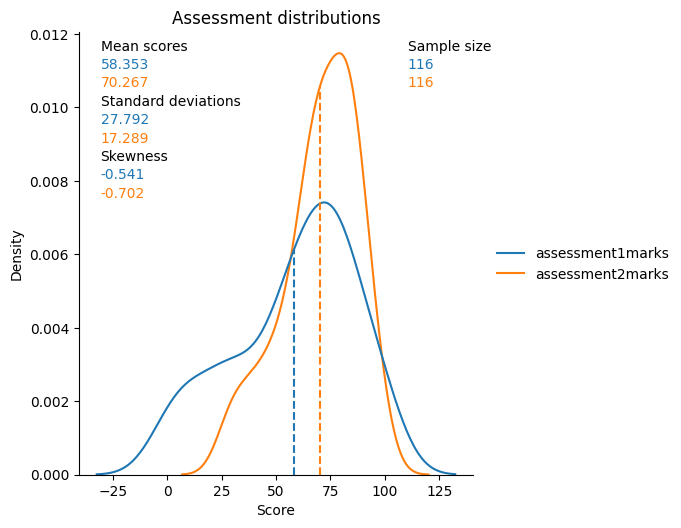

the outliers for assessment 2 were 27, 27 and 29


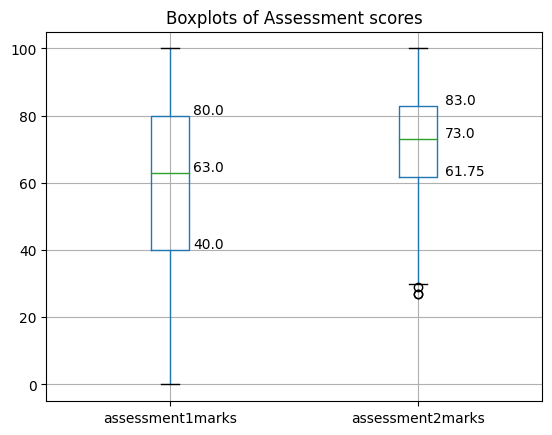

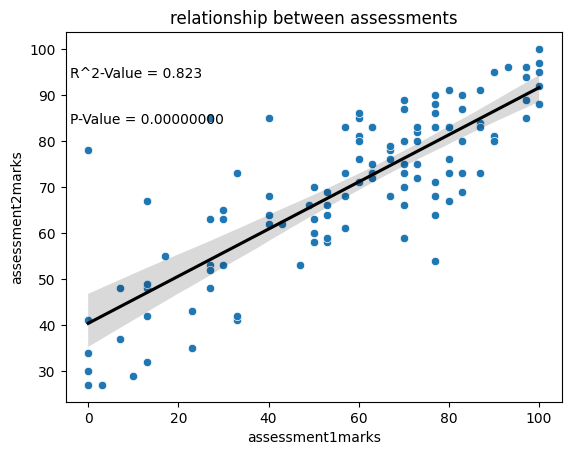

In [45]:
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import skew
from scipy.stats import gaussian_kde
from scipy.stats import mode

def displot(data, title, add_stats = False):
    
    sns.displot(data, kind = "kde")
    plt.xlabel("Score")
    
    plt.title(title)
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color'] 

    
    for i in range(len(data.keys())):

        mean = np.mean(np.mean(data[data.keys()[i]]))
        
        plt.axvline(mean, color = colors[i], ymax=(gaussian_kde(data[data.keys()[i]])(mean))[0]*((1/len(data.keys()))/plt.ylim()[1]), linestyle = '--')

        if add_stats:
            plt.annotate("{:.3f}".format(mean), (plt.xlim()[0]+10, plt.ylim()[1]-(0.0005*(i+2))), color = colors[i])

            stdev = np.std(data[data.keys()[i]])
            plt.annotate("{:.3f}".format(stdev), (plt.xlim()[0]+10, plt.ylim()[1]-(0.0005*(i+2))-0.0015), color = colors[i])

            skewness = skew(data[data.keys()[i]])
            plt.annotate("{:.3f}".format(skewness), (plt.xlim()[0]+10, plt.ylim()[1]-(0.0005*(i+2))-0.003), color = colors[i])
                
            n = len(data[data.keys()[i]])
            plt.annotate("{}".format(n), (plt.xlim()[1]-30, plt.ylim()[1]-(0.0005*(i+2))), color = colors[i])

            print("The modal value of {} is {} appearing {} times.".format(data.keys()[i], mode(data[data.keys()[i]])[0], mode(data[data.keys()[i]])[1]))
        
    if add_stats:
        plt.annotate("Mean scores", (plt.xlim()[0]+10, plt.ylim()[1]-(0.0005*(1))))
        plt.annotate("Standard deviations", (plt.xlim()[0]+10, plt.ylim()[1]-(0.0005*(1))-0.0015))
        plt.annotate("Skewness", (plt.xlim()[0]+10, plt.ylim()[1]-(0.0005*(1))-0.003))
            
        plt.annotate("Sample size", (plt.xlim()[1]-30, plt.ylim()[1]-(0.0005*(1))))
        
    plt.show()
        

def boxplot(title, df):
        
    df.boxplot()

    for i in range(len(df.keys())):
        plt.annotate("{}".format(np.median(df[df.keys()[i]])), (plt.xlim()[1]*((14+13*i)/32), 0.5+np.median(df[df.keys()[i]])))
        plt.annotate("{}".format(np.percentile(df[df.keys()[i]], 25)), (plt.xlim()[1]*((14+13*i)/32), 0.5+np.percentile(df[df.keys()[i]], 25)))
        plt.annotate("{}".format(np.percentile(df[df.keys()[i]], 75)), (plt.xlim()[1]*((14+13*i)/32), 0.5+np.percentile(df[df.keys()[i]], 75)))

    plt.title(title)
    print("the outliers for assessment 2 were {}, {} and {}".format(sorted(df[df.keys()[i]])[0], sorted(df[df.keys()[i]])[1], sorted(df[df.keys()[i]])[2]))
    plt.show()

                                        

def regplot(x, y, title, cdf):
    
    sns.scatterplot(data=cdf, x=x, y=y)
    
    sns.regplot(data=cdf, scatter=False, x=x, y=y, color = "black")
    
    r2 = pearsonr(cdf[x], cdf[y])[0]
    pval = pearsonr(cdf[x], cdf[y])[1]
    
    plt.annotate("R^2-Value = {:.3f}".format(r2), (plt.xlim()[0]+1, plt.ylim()[1]-10))
    plt.annotate("P-Value = {:.8f}".format(pval), (plt.xlim()[0]+1, plt.ylim()[1]-20))
    plt.title(title)
    plt.show()
    

df = pd.DataFrame({"assessment1marks": assessment1marks,
                   "assessment2marks": assessment2marks})

displot(df, "Assessment distributions", add_stats = True)
boxplot("Boxplots of Assessment scores", df)
regplot('assessment1marks', 'assessment2marks', "relationship between assessments", df)

==============================================================================================================================================================================
A)

I have decided to plot the distribution of assessment results on a kernel density estimation plot, because modelling them as continuous distributions allows better comparison with the normal distribution. From this we can see that they are approximately normal with negative skew, meaning there is more weight on the right tail of the distribution. This is also reflected in the modal values, the peak of the distribution, which are both greater than the mean result. By looking at the mean scores, we can see that students performed better on the second assessment. We can also see that there was a wider spread of marks in the first assessment.

This also visible in the boxplots where we can see that the IQR of the first assessment is much greater than that of the second and the tails extend further (marks ranging from 100 to 0). Despite the range of marks, none are considered outliers for the first assessment where as three marks are for the second.

From the regression/scatter plot we can see a strong positive correlation between a student's mark in assessment 1 and assessment 2, evidence by the R^2 value of 0.823. The low P-value indicates that it is very unlikely this relationship could have arisen by chance, so a student's performance in assessment 1 is a good indicator of how they will perform in assessment 2. Despite this, there are data points that don't adhere to the relationship (e.g., a student who scored 0 in assessment 1 and close to 80 in assessment 2, seen near the top left of the scatter plot).

==============================================================================================================================================================================


In questions B and C, you should work with just the assessment 1 marks.

## Section B: Alphabetical grades and curving [25 marks]

The (numerical) marks for the assessments are typically converted to (alphabetical) grades for the students' transcripts. For each grade, there is a desired proportion of the cohort that achieves that grade. Rather than being a strict requirement, it is seen as an approximate aim and can give information about whether the assessment was set appropriately or not. Below is a table showing the grade boundaries and the desired percentage of students in each grade:

| **Alphabetical Grade** | **Mark boundary** | **Desired % of cohort** |
|------------------------|-------------------|-------------------------|
|        A               |      70-100       |          15%            |
|        B               |      60-70        |          35%            |
|        C               |      50-60        |          35%            |
|        Failing         |      <50          |          15%            |

You can assume that a student falling precisely on the boundary will get the higher grade.


### B.1 Target Grades

Using just assessment 1's marks, calculate and display the proportion of students in each grade A, B, C and F (Failing). Does this approximately match the desired percentages from the above table? If not then explain the key differences.

### B.2 Grade Adjustment

When an exam or assessment has resulted in an unusual or unexpected distribution of marks across the cohort, some people consider it fairer to adjust the (numerical) marks to ensure that a more balanced distribution of (alphabetical) grades are achieved.  One approach for grade adjustment, sometimes called curving the grades, involves instead setting the grade boundaries at values that as closely as possible achieves the required distribution of values. Answer the following questions about the original marks $\{x_i\}_{i=1}^{n}$ from above.

1. Ensuring as close to 50% of the class will get an A or B as possible, where should you set the grade boundary between B and C, using the original marks (for fairness you should assume that any student on the grade boundary will get the higher grade)?
2. Ensuring that as close to 15% of the class as possible get an A, decide on grade boundary between grades A and B.
3. Using your B/C grade boundary from above and ensuring that as close to 35% of the class as possible get a C, decide on the grade boundary for C/Failing.

Now, examine and appropriately display the new distribution of grades and report on whether this adjustment has achieved a grade distribution that exactly matches or closely approximates the target. If the new grade distribution is not precise, can you explain what features of the data cause this.

**Remember:** There is a maximum of **3 figures** (plots or print out tables), **320 characters** of additional user defined output (e.g. using the `print` command), and **400 words** in markdown allowed per section.

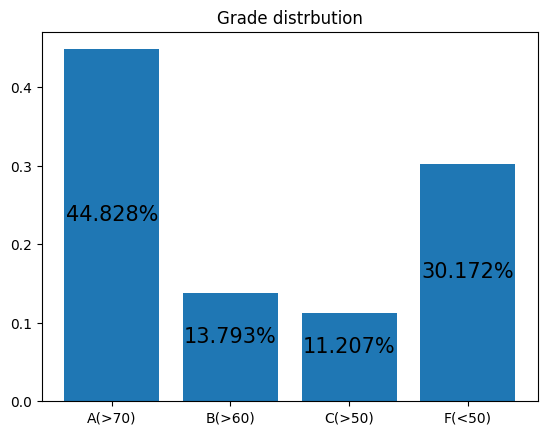

In [46]:
#B.1 Target Grades

def percentage_by_boundaries(data, a, b, c, plot = True, print_vals = False, title = ""):
    boundaries = {"A":[],
                "B":[],
                "C":[],
                "F":[]}

    for mark in data:
        if mark>=a:
            boundaries["A"].append(mark)
        elif mark>=b:
            boundaries["B"].append(mark)
        elif mark>=c:
            boundaries["C"].append(mark)
        else:
            boundaries["F"].append(mark)

    if plot:
        z = plt.bar(boundaries.keys(), [len(boundaries[x])/len(data) for x in boundaries.keys()])

        #plt.bar_label(z, labels = [">{}".format(x) for x in [a,b,c]] + ["<{}".format(c)])

        keys = [key for key in boundaries.keys()]
        
        x_labels = ["{}(>{})".format(keys[[a,b,c].index(x)], x) for x in [a,b,c]] + ["F(<{})".format(c)]

        plt.xticks(keys, x_labels, rotation='horizontal')

        

        for i in range(len(boundaries.keys())):
            plt.annotate('{}%'.format(round(len(boundaries[list(boundaries.keys())[i]])/len(data)*100, 3)), 
                        (z.patches[i].get_x() + z.patches[i].get_width() / 2, 
                            z.patches[i].get_height()/2), ha='center', va='center',
                        size=15, xytext=(0, 8),
                        textcoords='offset points')

        plt.title(title)
        plt.show()

    for key in boundaries.keys():
        if print_vals == True:
            print("{}:{}%".format(key, round(len(boundaries[key])/len(data)*100, 3)) ,sorted(boundaries[key]))
        #else:
            #print("{}:{}%".format(key, round(len(boundaries[key])/len(data)*100, 3)))
    
    return {key:len(boundaries[key])/len(data) for key in boundaries.keys()}

percentage_by_boundaries(assessment1marks, 70, 60, 50, title = "Grade distrbution");

==================================================================================================================================================================================
B. 1)

The proportions do not approximately match the desired percentages, the ends (A and Failing) had a much higher percentage than desired and the middle (B and C) were much lower. A also had a much higher percentage than F, reflecting the wide spread of marks and negative skewness from part A. this suggests the existing grade boundaries expected a narrrower spread of marks. 

==================================================================================================================================================================================

The grade boundary between B and C should be 64
,The grade boundary between A and B should be 84
,The grade boundary between C and F should be 24


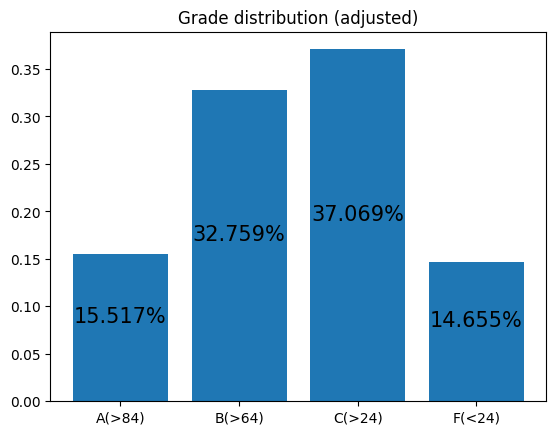

A:15.517% [87, 87, 87, 87, 90, 90, 90, 93, 97, 97, 97, 97, 100, 100, 100, 100, 100, 100]
,B:32.759% [67, 67, 67, 67, 70, 70, 70, 70, 70, 70, 70, 70, 73, 73, 73, 73, 73, 77, 77, 77, 77, 77, 77, 77, 77, 77, 80, 80, 80, 80, 80, 80, 80, 83, 83, 83, 83, 83]
,C:37.069% [27, 27, 27, 27, 27, 30, 30, 30, 33, 33, 33, 40, 40, 40, 40, 43, 47, 49, 50, 50, 50, 50, 53, 53, 53, 53, 53, 57, 57, 57, 57, 60, 60, 60, 60, 60, 60, 63, 63, 63, 63, 63, 63]
,F:14.655% [0, 0, 0, 0, 0, 3, 7, 7, 10, 13, 13, 13, 13, 13, 17, 23, 23]


In [47]:
#B.2 Grade Adjustment

def difference(a, b):
    return(abs(a-b))

def find_boundary_value(data, percentage):
    candidates = []
    percentages = []

    for i in range(-3, 4):
        candidates.append(sorted(data)[-1*round(len(data)*(percentage/100))]+i)
    for candidate in candidates:
        percentages.append(round(len([x for x in data if x >= candidate])/len(data)*100, 3))

    return candidates[list(map(difference, percentages, [percentage]*len(percentages))).index(min(map(difference, percentages, [percentage]*len(percentages))))]

print("The grade boundary between B and C should be {}".format(find_boundary_value(assessment1marks, 50)))
#percentage_by_boundaries(assessment1marks, 70, find_boundary_value(assessment1marks, 50), 50);
print("The grade boundary between A and B should be {}".format(find_boundary_value(assessment1marks, 15)))
#percentage_by_boundaries(assessment1marks, find_boundary_value(assessment1marks, 15), find_boundary_value(assessment1marks, 50), 50);
print("The grade boundary between C and F should be {}".format(find_boundary_value(assessment1marks, 85)))
percentage_by_boundaries(assessment1marks, find_boundary_value(assessment1marks, 15), find_boundary_value(assessment1marks, 50), find_boundary_value(assessment1marks, 85), print_vals= True, title = "Grade distribution (adjusted)");



=================================================================================================================================================================================

B. 2)

The grade boundary between B and C should be 64.

The grade boundary between A and B should be 84.

The grade boundary between C and F should be 24.

The new proportions approximately match the desired percentages and are as close as they can possibly get. The fact that every result is an integer means that many marks are the same. This creates floors and ceilings of marks that must be classified in the same way and so it is impossible to create boundaries that result in proportions exactly matching the desired percentages. 

=================================================================================================================================================================================

## Section C Grade Adjustment - Rebasing [25 marks]

Another way to adjust grades is to define an adjusted mark, $y_i$, for each student $i$ based on the original mark, $x_i$, such that the new marks $\{y_i\}_{i=1}^{n}$ as closely as possible achieves the desired distribution of grades using the original grade boundaries. One approach to this is described below and we'll call this rebasing. This adjustment involves first standardising each mark from $x_i$ to $z_i$ (where $\{z_i\}_{i=1}^{n}$ are assumed to have mean $0$ and standard deviation $1$), then reversing the standardisation operation on $z_i$ to give $y_i$, where $\{y_i\}_{i=1}^{n}$ has the new mean and new standard deviation.

For the following, assume that the original marks $\{x_i\}_{i=1}^{n}$ are those from assessment 1.  Answer the following questions, explaining your reasoning for each:

### C.1 Target mean and SD

If we assume that the distribution of original marks, $\{x_i\}_{i=1}^{n}$ is approximately symmetrically distributed.
  * a) What should the mean,  $\mu_y$, of the new marks, $\{y_i\}_{i=1}^{n}$ be? (Even if you do not think the data satisfies this assumption.)
  * b) Given your mean from the previous part, and assuming the data is approximately normally distributed. How would you now choose your standard deviation for the new marks? Consider that if our $y_i$ values are normally distributed we can calculate with high accuracy the proportion of data greater than some number of standard deviations above the mean. (Again, you should give an answer even if you do not think the data satisfies this assumption.)
  
### C.2 Standardisation

Now standardise the marks from assessment 1. Check that the transformation is successful.

### C.3 Rebasing

The target mean and standard deviation for the $y_i$ values are those you specify in steps 1 and 2. Now reverse the standardisation process on the $z_i$ values to give the $y_i$ values. Check that the rebasing is successful.

### C.4 Analysis
Investigate and show graphically the new proportions of the cohort within each grade boundary. Remark on whether or not this approach achieves the target grade distribution and why/why not?

### C.5 Comparison with curving

Compare this rebasing method with the curving method from question B. Which method do you think is fairer in general? Would you like to see either approach applied to your own assessments? Or would you prefer marks to remain untouched even if the grade distributions were significantly different from the targets? You will need to explain the key principles underlying each method and justify your preferences meaningfully in statistical terms.

**Remember:** There is a maximum of **3 figures** (plots or print out tables), **320 characters** of additional user defined output (e.g. using the `print` command), and **400 words** in markdown allowed per section.

==========================================================================================================================================================================
C. 1)

a)

The mean should equal 60. Assuming the data is symmetrically distributed, this will ensure that 50% of the data (15% + 35%) fall on either side of the boundary between B and C, achieving a distribution consistent with the desired percentages.

b)

The standard deviation should be 9.62. We want the top 15% of data to be greater than 70 and bottom 15% less than 50, so using our mean value of 60, and the Z score table, we can calculate that sigma must be 9.62. 

$$ P(Z \leq \frac{50-60}{\sigma}) = 0.15 $$

==========================================================================================================================================================================

After standardizing the marks are [0.670929881095636, -1.6318826187906341, 1.0307443342028657, 0.670929881095636, -0.04869902511882341, 0.1671896467455144, 1.4985031232422643, -1.1281423844405125, 0.670929881095636, 1.1386886701350345, -1.6318826187906341, -0.3005691422938842, -0.33655058760460715, 0.3111154279884063, 1.3905587873100953, 1.4985031232422643, -2.0996414078300325, 0.5270040998527441, 1.4985031232422643, 0.4190597639205752, 0.7788742170278049, -0.19262480636171528, 1.3905587873100953, 0.4190597639205752, 0.1671896467455144, 0.5270040998527441, -0.6603835954011139, 1.3905587873100953, -0.19262480636171528, 0.8868185529599738, 1.3905587873100953, 1.0307443342028657, -0.6603835954011139, 0.8868185529599738, 0.1671896467455144, 0.4190597639205752, 0.0592453108133455, -1.2720681656834043, 0.8868185529599738, 0.0592453108133455, -1.6318826187906341, 0.0592453108133455, -1.1281423844405125, 0.670929881095636, 0.4190597639205752, -1.0201980485083435, 0.0592453108133455, -2.0996414

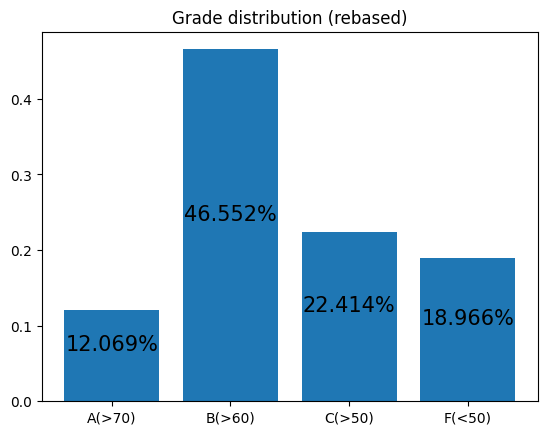

In [48]:
def standardize(data):
    return [(mark-np.mean(data))/np.std(data) for mark in data]

def rebase(data, target_mean, target_stdev):
    return [mark*target_stdev + target_mean for mark in data]

#displot(pd.DataFrame({"standardized marks":standardize(assessment1marks)}), "standardized")

print("After standardizing the marks are {}".format(standardize(assessment1marks)))

#displot(pd.DataFrame({"Rebased marks":rebase(standardize(assessment1marks), 60, 9.62)}), "Rebased")

print("After rebasing the marks are {}".format(rebase(standardize(assessment1marks), 60, 9.62)))


percentage_by_boundaries(rebase(standardize(assessment1marks), 60, 9.62), 70, 60, 50, title = "Grade distribution (rebased)");


================================================================================================================================================================================
C. 4)

This approach is closer to the desired percentages than the original distribution of marks but is still flawed. This is due to the fact that the data is not symmetrical, the negative skew results in a lower percentage than desired being classified as A and a higher percentage than desired being classified as F. Then a much greater proportion in B than C, because the general right shift means B is effectively in the centre of the data.

================================================================================================================================================================================

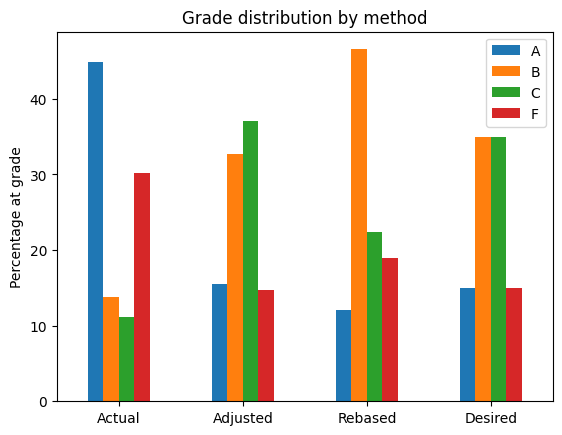

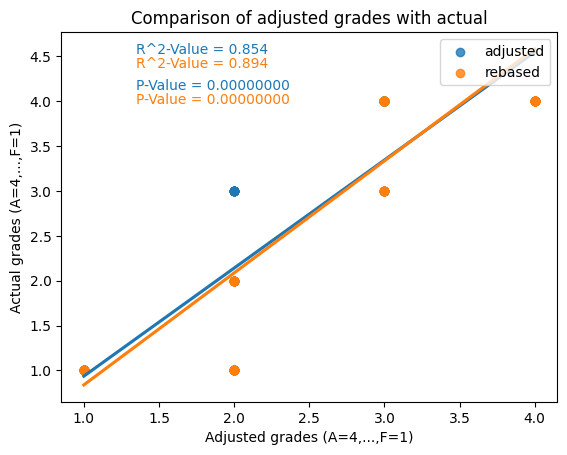

In [49]:
#C5

w = percentage_by_boundaries(assessment1marks, 70, 60, 50, plot = False);
x = percentage_by_boundaries(assessment1marks, find_boundary_value(assessment1marks, 15), find_boundary_value(assessment1marks, 50), find_boundary_value(assessment1marks, 85), plot = False);
y = percentage_by_boundaries(rebase(standardize(assessment1marks), 60, 9.62), 70, 60, 50, plot = False);
z = {"A":0.15,
     "B":0.35,
     "C":0.35,
     "F":0.15}

df = 100*pd.DataFrame({"Actual": w,
                  "Adjusted": x,
                  "Rebased": y,
                  "Desired": z})

#print(df.T)
z = df.T.plot(kind = "bar", rot=0, title = "Grade distribution by method")
plt.ylabel("Percentage at grade")



def hisdisplot(data, title, percentiles = [25, 50, 75], colour = "blue"):
    
    
    sns.displot(data, kde = "True", palette=[colour], bins = [0, 50, 60, 70, 100])
    
    plt.annotate("Median score = {}".format(np.median(data)), (plt.xlim()[0]+1, plt.ylim()[1]-2))
    plt.annotate("Mean score = {:.3f}".format(np.mean(np.mean(data))), (plt.xlim()[0]+1, plt.ylim()[1]-4))
    plt.annotate("Standard Deviation = {:.3f}".format(np.sqrt(np.mean(np.mean(abs(data - data.mean())**2)))), (plt.xlim()[0]+1, plt.ylim()[1]-6))
    #plt.annotate("Mode = {}".format(st.mode(x)[0][0][0]), (plt.xlim()[0]+1, plt.ylim()[1]-8))
    vals = np.percentile(data, percentiles, 0)
    for q in vals:
        plt.axvline(q, color='red')
        
    
    plt.xlabel("Score")
    plt.title(title)
    plt.show()

#hisdisplot(assessment1marks, "title")#, bins = [50, 60, 70])

def regplot(x, y, title):
    sns.regplot(x=x, y=y)

    r2 = pearsonr(x, y)[0]
    pval = pearsonr(x, y)[1]
        
    plt.annotate("R^2-Value = {:.3f}".format(r2), (plt.xlim()[0]+0.05, plt.ylim()[1]-0.2))
    plt.annotate("P-Value = {:.8f}".format(pval), (plt.xlim()[0]+0.05, plt.ylim()[1]-0.4))
    plt.title(title)
    plt.show()


def grade(data, a, b, c):
    output = []
    for mark in data:
        if mark >= a:
            output.append(4)
        elif mark >= b:
            output.append(3)
        elif mark >= c:
            output.append(2)
        elif mark < c:
            output.append(1)
    
    return output

actual = grade(assessment1marks, 70, 60, 50)
#print(len(actual))
adjusted = grade(assessment1marks, find_boundary_value(assessment1marks, 15), find_boundary_value(assessment1marks, 50), find_boundary_value(assessment1marks, 85))
#print(len(adjusted))
rebased = grade(rebase(standardize(assessment1marks), 60, 9.62), 70, 60, 50)
#print(len(rebased))                

x_s = [adjusted, rebased]
legend = ["adjusted", "rebased"]

fig, ax = plt.subplots()
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'] 

for i in range(len(x_s)):
    sns.regplot(x = x_s[i], y = actual, ax=ax, color = colors[i], ci=None, label = legend[i])
    r2 = pearsonr(x_s[i], actual)[0]
    pval = pearsonr(x_s[i], actual)[1]
            
    plt.annotate("R^2-Value = {:.3f}".format(r2), (plt.xlim()[0]+0.5, plt.ylim()[1]-0.2-0.2*(i)), color = colors[i])
    plt.annotate("P-Value = {:.8f}".format(pval), (plt.xlim()[0]+0.5, plt.ylim()[1]-0.6-0.2*(i)), color = colors[i])

plt.xlabel("Adjusted grades (A=4,...,F=1)")
plt.ylabel("Actual grades (A=4,...,F=1)")
plt.legend(loc = "upper right")
plt.title("Comparison of adjusted grades with actual")
plt.show()


==============================================================================================================================================================================
C. 5)

By comparing the grade distributions we can see that adjusting the boundaries achieves a distribution much closer to the desired percentages. However, this also creates a large gap between B and C, potentially making the marking too lenient. I believe that the initial boundaries were set as they were for a reason and while aiming for the desired percentages, the new distribution of marks should reflect the actual marks as accurately as possible. Computing the correlation between each method and the actual marks, shows that rebasing achieves this more accurately. To be as fair as possible, the actual marks should be used but there are other motivations for the desired percentages, so choosing an adjustment method is contingent on how close the new marks must be to the desired percentages. 

==============================================================================================================================================================================

*In section D, we are no longer concerned with the mark data.*

## Section D: Second marking [25 marks]

In order to check the consistency of a marking process, a random subset of the scripts can be second marked. This means that they are looked over by a second person for errors. For our purposes here, we can assume that if a script is incorrectly marked and it is selected as part of the random subset, then the error will be detected. We also assume that there is no chance of second marking reporting an error that isn't present. 

### D.1 Detection with known number of errors

Imagine that random subset of $30$ scripts is chosen for second marking and there is a total of $14$ incorrectly marked scripts from a total of $116$ scripts. With what probability will $5$ or more incorrectly marked scripts be detected. In other words, with what probability will $5$ or more of the $14$ incorrectly marked scripts appear in the second marking sample? Make it clear how you reach your answer, including what probabilities and/or distributions you make use of.

### D.2 Modelling a random number of errors

An analyst, working on the second marking data, models the incorrectly marked scripts in the following way. Each script is incorrectly marked with probability $q$ and this is independent of the correctness of marking for other scripts or the mark given. As before a random subset of $K$ scripts is chosen for second marking from a total of $N$ scripts, but now the number of incorrectly marked scripts detected depends on this number. Consider $I$ to be the total number of incorrectly marked scripts, and $D$ to be the number detected. Describe the joint probability distribution $P(I,D)$ in general terms. You may wish to discuss outcomes, sample space, relevant events, distributions, marginal probabilities and conditional probabilities.

### D.3 Investigating the joint-distribution

The analyst notes that for these marks $N=116$, and assumes that $q=0.05$ and $K=30$ for the joint distribution $P(I,D)$ described in step 2. Calculate probabilities for the parts of the joint distribution with *meaningfully non-zero probabilities*${}^*$ and represent them visually. (You may prefer to represent this in terms of marginal and conditional probabilities). Can you use this to decide on a good threshold for $D$ at which to question the accuracy of the assumption that $q=0.05$?

### D.4 Reflecting on assumptions

How realistic are the assumptions made here? How might reality differ from your model? Discuss how these differences might mean that the true distribution of $P(I,D)$ is different from that described in parts 2 and 3.

*: For this, you should choose a small threshold below which a probability is too small to be meaningfully different from $0$. Then you should explicitly report all values of the joint distribution that are above that value. You do not need to exclude all values below that threshold, if this makes reporting easier/simpler, but you should not report the probability of every highly unlikely outcome.

**Remember:** There is a maximum of **3 figures** (plots or print out tables), **320 characters** of additional user defined output (e.g. using the `print` command), and **400 words** in markdown allowed per section.

==========================================================================================================================================================================================================================

$$ D. 1) $$

$$ X \sim Hypergeometric(116, 14, 30) $$

$$ P(X \geq 5) = 1 - P(X < 5) $$

$$ = 1 - \sum_{k=0}^4 \frac{{14 \choose k}{102 \choose 30-k}}{{116 \choose 30}} $$

$$ \approx 0.275 $$  

==========================================================================================================================================================================================================================

***D. 2)***

***Sample space and outcomes***

Scripts: $ N $

Incorrectly marked scripts: $ 0 \leq E[I] = Nq \leq N $

Correctly marked scripts: $ N(1-q) = N-I $

Random Subset: $ K \leq N $

Detected: $ 0 \leq D \leq K $ and $ 0 \leq D \leq I $

if $ K = N, D = I $

Possible subsets: ${N \choose K} = \frac{N!}{(N-K)!K!} $

***Events***

Selecting a script for second marking: $ P(s \in K) $

Detecting an incorrectly marked script: $ P(s \in K) $ and $ P(s \in I) $

Certain number of incorrect marks being detected: $ P(D=d) $

***Probability distribution of number of incorrectly marked scripts***

$ I \sim  Binomial(N, q) $

$ P(I = i) = {N \choose i}q^{i}(1-q)^{N-i} $

***Probability distribution of detected incorrectly marked scripts***

$ D \sim Hypergeometric(N, i, K) $

$ P(D = d) = \frac{{i \choose d}{N-i \choose K-d}}{{N \choose K}}$

***Joint Probability distribution P(I, D)***

$ P(I=i|D=d) = {N \choose i}q^{i}(1-q)^{N-i} \frac{{i \choose d}{N-i \choose K-d}}{{N \choose K}} $

***Marginal Probability of number of detected scripts***

$ P(D = d) = \sum_{i=0}^N P(I = i, D = d) $

$ = \sum_{i=d}^N {N \choose i}q^{i}(1-q)^{N-i} \frac{{i \choose d}{N-i \choose K-d}}{{N \choose K}} $

***Conditional Probability of number of scripts incorrectly marked given number detected***

$ P(I=i|D=d) = \frac{P(I=i,D=d)}{P(D=d)} $

$ = \frac{{N \choose i}q^{i}(1-q)^{N-i} \frac{{i \choose d}{N-i \choose K-d}}{{N \choose K}}}{\sum_{i=d}^N {N \choose i}q^{i}(1-q)^{N-i} \frac{{i \choose d}{N-i \choose K-d}}{{N \choose K}}}$

==========================================================================================================================================================================================================================

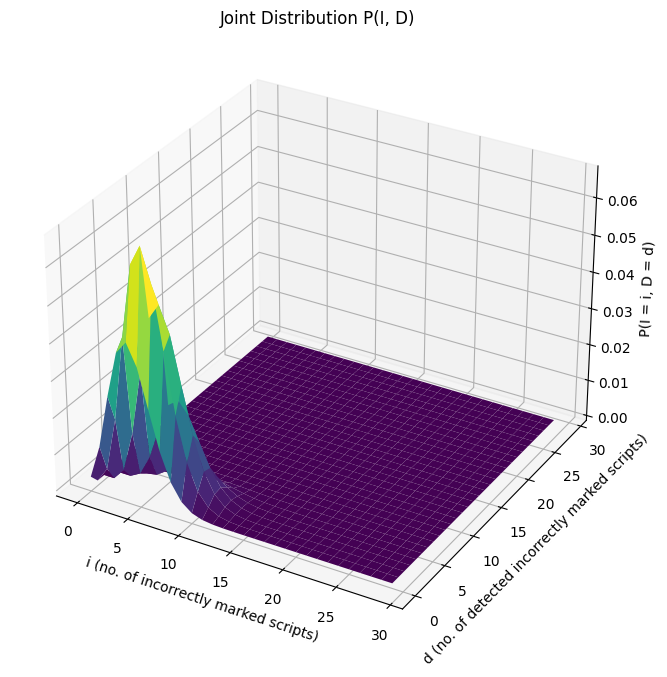

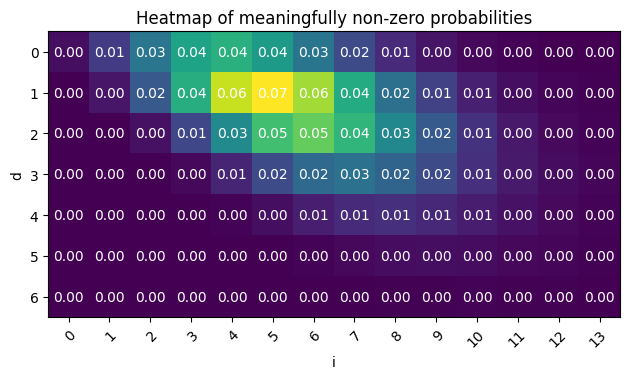

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math


def joint_prob(n, i, q, d, k):
    if i < d:
        return 0
    return ncr(n, i)*(q**i)*((1-q)**(n-i))*ncr(i, d)*(ncr(n-i, k-d)/ncr(n, k))

def marginal_prob(n, q, d, k):
    return sum(joint_prob(n, i, q, d, k) for i in range(d, n+1))


def ncr(n, r):
    f = math.factorial
    if r > n:
        return 0
    return f(n) / (f(r) * f(n-r))

n = 116
q = 0.05
k = 30

I = np.arange(0, 30)
D = np.arange(0, 30)
I, D = np.meshgrid(I, D)

jpid = []
mpid = []
for x in range(len(I)):
    mnext_row = []
    jnext_row = []
    for y in range(len(D)):
        i = int(I[x][y])
        d = int(D[x][y])

        jprob = joint_prob(n, i, q, d, k)
        jnext_row.append(jprob)
        
        #mprob = marginal_prob(n, q, d, k)
        #mnext_row.append(mprob)

    jpid.append(jnext_row)
    #mpid.append(mnext_row)

jpid = np.array(jpid)
#mpid = np.array(mpid)         

jfig = plt.figure(figsize=(10, 8))
ax = jfig.add_subplot(111, projection='3d')

ax.plot_surface(I, D, jpid, cmap='viridis', alpha=1)
ax.set_xlabel('i (no. of incorrectly marked scripts)')
ax.set_ylabel('d (no. of detected incorrectly marked scripts)')
ax.set_zlabel('P(I = i, D = d)')
ax.set_title('Joint Distribution P(I, D)')
plt.show()

#mfig = plt.figure(figsize=(10, 8))
#ax = mfig.add_subplot(111, projection='3d')

#ax.plot_surface(I, D, mpid, cmap='viridis', alpha=1)
#ax.set_xlabel('i (no. of incorrectly marked scripts)')
#ax.set_ylabel('d (no. of detected incorrectly marked scripts)')
#ax.set_zlabel('∑ᵢ P(D = d)')
#ax.set_title('Marginal Distribution ∑ᵢ P(D)')
#plt.show()

heat = []
for j in range(7):
    row = []
    for k in range(14):
        row.append(jpid[j][k])
    heat.append(row)

heatmap = np.array(heat)

fig, ax = plt.subplots()
im = ax.imshow(heatmap)

ax.set_xticks(np.arange(len(heat[0])))
ax.set_yticks(np.arange(len(heat)))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(7):
    for k in range(14):
        text = ax.text(k, j, format(jpid[j][k], '.2f'),
                       ha="center", va="center", color="w")

ax.set_title("Heatmap of meaningfully non-zero probabilities")
ax.set_xlabel('i')
ax.set_ylabel('d')
fig.tight_layout()
plt.show()

D. 3)

From the surface plot and the heatmap we can see that 6 makes a good threshold for d. The probability of detecting 6 or more incorrectly marked scripts is so low for every possible value of i that it is unlikely q is 0.05, it is probably higher.

D. 4)

It is unfair to assume q will be 0.05, the chance of incorrect marking will vary depending on the type of assessment and the number of examiners (1 examiner is likely to repeat the same mistake more often). Also it is unfair to assume that every incorrect script in the second marking subset willbe detected. 